[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45, 0.9, 90], [0.3, 2.52, 180], [3.335, 1.2, 90], [2.6, 1.2, 0.0]]
[[0.45

<Figure size 640x480 with 0 Axes>

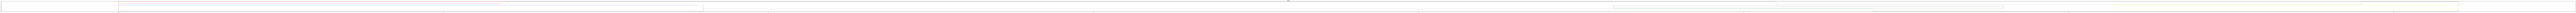

探索パターン数:46


In [8]:
from time import sleep
import numpy as np
import random
import math
import csv
import matplotlib.pyplot as plt


def axis(start,end,step):
    ax = []
    while(start <= end):
        ax.append(start)
        start += step
    return ax

class Funiture():
    def __init__(self,data):
        self.name = data[0]
        self.lenX = data[1] #単位：mm
        self.lenY = data[2]
        self.height = data[3]
        self.room = data[4]
        self.color = data[5]
        self.space = data[6]
        self.index = data[7]
        
        self.data = data
        self.info = []
        self.center = []
        self.sita = 0
        self.area = self.lenX * self.lenY
        self.rightupper = []
        self.rightlower = []
        self.leftupper = []
        self.leftlower = []
        self.stdX = self.lenX
        self.stdY = self.lenY
        self.overlap = 0
        self.wall_distance = 0
        self.circle_space = self.lenX * self.space
        

        self.x_range = [self.lenX / 2, self.room[0] - self.lenX / 2] #[最小値、最大値]
        self.y_range = [self.lenY / 2, self.room[1] - self.lenY / 2]
        self.x_list = []
        self.y_list = []
        self.ax_list = []
        self.info_list = []
        
        
    
    #家具を配置する
    def set_funiture(self, info):
        self.info = info
        self.change_settings(info[2])
        self.center = [info[0],info[1]]
        self.sita = info[2]
        self.rightupper = [self.center[0] + self.lenX / 2, self.center[1] + self.lenY / 2]
        self.rightlower = [self.center[0] + self.lenX / 2, self.center[1] - self.lenY / 2]
        self.leftupper = [self.center[0] - self.lenX / 2, self.center[1] + self.lenY / 2]
        self.leftlower = [self.center[0] - self.lenX / 2, self.center[1] - self.lenY / 2]
        self.wall_funiture_distance()
        
        
    
    #座標をリセットする
    def reset(self):
        self.set_funiture(self.info)
    
    #回転による寸法の修正
    def change_settings(self, sita):
        if(sita == 90 or sita == 270):
            self.lenX = self.stdY
            self.lenY = self.stdX
            self.x_range = [self.lenX / 2, self.room[0] - self.lenX / 2] #[最小値、最大値]
            self.y_range = [self.lenY / 2, self.room[1] - self.lenY / 2]
        else:
            self.lenX = self.stdX
            self.lenY = self.stdY
            self.x_range = [self.lenX / 2, self.room[0] - self.lenX / 2] #[最小値、最大値]
            self.y_range = [self.lenY / 2, self.room[1] - self.lenY / 2]
        
            
    #有効スペースの確保:スペースが必要な方向
    def space_directions(self):
        direction = 0
        if(self.name == "bed"):
            if(self.sita == 0 or self.sita == 180):
                upper = self.room[1]-self.rightupper[1]
                lower = self.leftlower[1] 
                if(upper >= lower):
                    direction = 0
                else:
                    direction = 180
            else:
                right = self.room[0] - self.rightupper[0]
                left = self.leftlower[0]
                if(right >= left):
                    dierction = 270
                else:
                    direction = 90
                
        else:
            direction = self.sita
            
        return direction
    
    #全探索する座標
    def all_axis(self):
        self.x_list = axis(self.x_range[0],self.x_range[1],0.1)
        self.y_list = axis(self.y_range[0],self.y_range[1],0.1)
        self.ax_list = []
        for x in self.x_list:
            for y in self.y_list:
                self.ax_list.append([x,y])
    
    #探索データ
    def create_info(self):
        for sita in self.sita_list:
            self.change_settings(sita)
            self.all_axis()
            for ax in self.ax_list:
                info = [ax[0],ax[1],sita]
                self.info_list.append(info)

    #家具と壁の距離
    def wall_funiture_distance(self):
        x_distance = min(abs(self.center[0] - self.x_range[0]), abs(self.x_range[1] - self.center[0]))
        y_distance = min(abs(self.center[1] - self.y_range[0]), abs(self.y_range[1] - self.center[1]))
        distance = min(x_distance, y_distance)
        self.wall_distance = distance
        
    #家具の延長
    def strech(self,direction,strech):
        self.circle_space = self.lenX * self.space
        if(direction == 0):
            self.rightupper[1] += strech
        elif(direction == 90):
            self.leftlower[0] -= strech
        elif(direction == 180):
            self.leftlower[1] -= strech
        elif(direction == 270):
            self.rightupper[0] += strech


#バランス
def balance(funiture_list):
    #家具と壁の距離を変数にする
    balances = 0
    bals = []
    areas = 0
    for funiture in funiture_list:
        if(funiture.name == "chair"):
            break
        #print(f"{funiture.name} wall distance:{round(funiture.wall_distance,2)} ")
        bals.append((funiture.wall_distance * funiture.area)**2)
        areas += funiture.area
        
    balances = np.sqrt(sum(bals) / (areas**2))
    return balances

#転倒したタンスが開口部を塞ぐか
def opening(funiture,environment_list):
    opening = 0
    door_weight = 0.3
    window_weight = 0.15
    for environment in environment_list:
        direction, distance = f1_direction(environment,funiture)
        strech = funiture.height
        funiture.strech(direction,strech)
        if(environment.name == "door"):
            #ドアを開閉可能な長さ
            fall_distance = funiture.room[1] - funiture.rightupper[1]
            if(funiture.sita == 0):
                if(funiture.rightupper[1] >= environment.leftlower[1] and fall_distance >= 0):
                    opening += open_logistic_function(fall_distance)
                    #print(f"door distance:{fall_distance} score:{round(open_logistic_function(fall_distance),2)}")
            elif(funiture.sita == 270):
                if(funiture.rightupper[0] >= environment.leftlower[0] and fall_distance >= 0):
                    opening += open_logistic_function(fall_distance)
                    #print(f"door distance:{fall_distance} score:{round(open_logistic_function(fall_distance),2)}")
        else:
            if(direction == funiture.sita):
                area = streched_area(funiture,environment,distance,strech)
                propotion = area / environment.area
                opening += sigmoid(propotion ,window_weight)
                #print(f"window area:{propotion}% score:{round(sigmoid(propotion,window_weight),2)}")
        funiture.reset()
    funiture.reset()
    return opening
def open_logistic_function(x):
    a = 9
    b = 0.8 #x座標
    return 1 / (1 + np.exp((x-b)*a)*1)
#家具の利用スペース
def circulation(funiture_list):
    circle = 0
    cirs = []
    for f1 in funiture_list:
        direction = f1.space_directions()
        jud = True
        occupied_area = 0
        for f2 in funiture_list:
            if(f1.name == f2.name or (f1.name == "desk" and f2.name == "chair") or (f1.name == "chair" and f2.name == "desk")):
                continue
            else:
                sita,distance = f1_direction(f2,f1)
                if(direction == sita):
                    f1.strech(direction,f1.space)
                    area = streched_area(f1,f2,distance,f1.space)
                    occupied_area += area
                    
            f1.reset()
        propotion = occupied_area / f1.circle_space * 100
        c_f1 = circle_sigmoid(propotion)
        #print(f"{f1.name} area:{round(propotion,2)}% score:{round(c_f1,2)}")
        cirs.append(c_f1**2)
        f1.reset()
        
    circle = np.sqrt(np.sum(cirs))
    return circle

def circle_sigmoid(x):
    a = 0.5
    b = 30
    return 1 / (1 + np.exp(-(x-b)*a)) 

#家具の転倒
def falldown(f1,f2): #f1:bed f2:shelf
    fall = 0
    sita, distance = f1_direction(f1,f2)
    if(sita == f2.sita):
        fall = danger_func(distance)
        if(f1.name == "desk"):
            fall = head_danger(distance)
            
            
    return fall


#ペア
def pairwise(funiture1, funiture2): #desk, chair
    approciation = 0.2
    minimum = 0
    
    pair = 0
    judge = True
    direction,distance = f1_direction(funiture2,funiture1)
    if(direction != funiture1.sita):
        judge = False
        distance = calc_distance(funiture1.center,funiture2.center)
        pair = pair_score(distance)
    if(minimum <= distance and distance <= approciation):
        pair = 0
    else:
        pair = pair_sigmoid(distance)
    #print(f"pair {judge} distance:{round(distance,2)} score:{round(pair,2)}")
    return pair

def pair_score(x):
    desk_diameter = np.sqrt(1.1**2 + 0.53**2)
    chair_diameter = np.sqrt(0.6**2 + 0.6**2)
    border = (desk_diameter + chair_diameter)/2
    if(x < border):
        return logistic_function(x)
    else:
        return pair_sigmoid(x)
def pair_sigmoid(x):
    a = 15
    b = 1.9
    return (1 / (1 + np.exp(-(x-b)*a )) )/2 + 0.5
def logistic_function(x):
    ad = 20
    bd = 1.1 #x座標
    return (1 / (1 + np.exp((x-bd)*ad)*1))/2 + 0.5
def calc_distance(desk_ax,chair_ax):
    return np.sqrt((desk_ax[0]-chair_ax[0])**2 + (desk_ax[1]-chair_ax[1])**2)
#全体のコスト
def all_cost(funiture_list,environment_list):
    danger = 0
    pair = 0
    circle = 0
    bal = 0
    opens = 0
    for i in range(len(funiture_list)):
        #タンスが倒れた時に開口部を塞ぐか
        f1 = funiture_list[i]
        if(f1.name == "shelf"):          
            opens += opening(f1,environment_list)
        for j in range(i+1,len(funiture_list)):
            f2 = funiture_list[j]
            #転倒
            if(f1.name == "bed" and f2.name == "shelf") :
                danger += falldown(f1,f2)
            elif (f2.name == "desk" and f1.name == "shelf"):
                danger += falldown(f2,f1)
            #ペア
            if(f1.name == "desk" and f2.name == "chair"):
                pair += pairwise(f1,f2)
            
    #全体で考えるコスト
    bal += balance(funiture_list)
    #利用スペース
    circle += circulation(funiture_list)
    #ノルム
    nolm = np.sqrt(danger**2 + pair**2 + circle**2 + bal**2 + opens**2)
    
    return float(nolm), float(danger), float(pair), float(circle), float(bal), float(opens)
    #return nolm, danger, pair, circle, bal, open

def f1_direction(f1, f2): #f1がf2に対してどの方向にあるか
    direction = 0 #sita
    kyori = 0
    if(f1.leftlower[0] <= f2.rightupper[0] and f2.rightupper[0] <= (f1.rightupper[0] + f2.lenX / 2)):
        if(f2.center[1] <= f1.center[1] ):
            direction = 0
            kyori = f1.leftlower[1] - f2.rightupper[1]
        elif(f2.center[1] >= f1.center[1] ):
            direction = 180
            kyori = f2.leftlower[1] - f1.rightupper[1]
        else:
            direction = -1
    elif(f1.leftlower[1] <= f2.rightupper[1] and f2.rightupper[1] <= (f1.rightupper[1] + f2.lenY / 2)):
        if(f2.center[0] <= f1.center[0] ):
            direction = 270
            kyori = f1.leftlower[0] - f2.rightupper[0]
        elif(f2.center[0] >= f1.center[0] ):
            direction = 90
            kyori = f2.leftlower[0] - f1.rightupper[0]
        else:
            direction = -1
    elif(f2.leftlower[0] <= f1.rightupper[0] and f1.rightupper[0] <= (f2.rightupper[0] + f1.lenX / 2)):
        if(f1.center[1] <= f2.center[1] ):
            
            direction = 180
            kyori = f2.leftlower[1] - f1.rightupper[1]
        elif(f1.center[1] >= f2.center[1] ):
            direction = 0
            kyori = f1.leftlower[1] - f2.rightupper[1]
        else:
            direction = -1
    elif(f2.leftlower[1] <= f1.rightupper[1] and f1.rightupper[1] <= (f2.rightupper[1] + f1.lenY / 2)):
        if(f1.center[0] <= f2.center[0] ):
            direction = 90
            kyori = f2.leftlower[0] - f1.rightupper[0]
        elif(f1.center[0] >= f2.center[0] ):
            direction = 270
            kyori = f1.leftlower[0] - f2.rightupper[0]
        else:
            direction = -1
    else:
        direction = -1
    return direction, kyori

def streched_area(funiture1,funiture2,distance,strech):#f1を延長させる
    if(strech <= distance):
        return 0
    #横の長さ
    horizon = min(funiture1.rightupper[0],funiture2.rightupper[0]) - max(funiture1.leftlower[0], funiture2.leftlower[0])
    #縦の長さ
    vertical = min(funiture1.rightupper[1],funiture2.rightupper[1]) - max(funiture1.leftlower[1], funiture2.leftlower[1])
    area = horizon * vertical
    
    return abs(area)

def sigmoid(x,a):
    return (1 / (1 + np.exp(-x*a)) -0.5) * 2

#危険度関数
def gauss(x,mu,s):
    y=np.exp(-((x-mu)**2) / (2*s**2))
    return y

def gauss_func(w,x):
    m=len(w)-1
    mu=np.linspace(0,169,m)
    s=mu[1]-mu[0]
    y=np.zeros_like(x)
    for j in range(m):
        y=y+w[j]*gauss(x,mu[j],s)
    y=y+w[m]
    return y

def exp_func(x):
    w = 1
    y = np.exp(-w*x)
    return y

def load_func(x):
    w=[ 0.06954236,  0.03078031,  0.02758652 , 0.0663609 ,  0.01620405,  0.09708494,
  0.01028567 , 0.14364312 ,-0.00700513 , 0.23043054, -0.06737373, 0.40363419,
 -0.14377155 , 0.26473349 ,-0.04645459,  0.16379096, -0.00843872,  0.11045244,
  0.00113296 , 0.08004228, -0.00233551,  0.06089862,  0.30262742]
    y=gauss_func(w,x)
    return y


def danger_func(x):
    x = x * 100
    if(x <= 178):
        y = load_func(x)
    else:
        y = 0
    return y

def head_danger(x):
    H = 1.1 #タンスの重心
    D = 1.2 #椅子に座った人がタンスと衝突する地点の高さ
    B = 0.57 #タンスの奥行き
    L = np.sqrt((B/2)**2 + H**2)
    alpha = np.arcsin(H/L)
    sita = np.arctan(D/x)
    #delta_H =   L * np.sin(alpha+sita)
    delta_H = H - H * np.sin(sita) #タンスの高さ
    delta_H = delta_H * 100

    m_shelf = 110 #タンスの質量 kg
    h_shelf = 1.7 #箪笥の高さ
    m_head = 6.08 #頭部の質量 kg
    alpha1 = 0.07
    #Iy = 176.98 #慣性モーメント kg*m^2
    Iy = m_shelf * (h_shelf**2 + B**2) / 12 + m_shelf * H #慣性モーメント kg*m^2
    g = 9.80665 #重力加速度
    m = 87

    v1 = h_shelf * np.sqrt((2 * g * m * delta_H / 100) / Iy) #家具頭部速度
    v2 = v1 * (x / h_shelf) #家具衝突速度
    v3 = m_shelf *v2 * alpha1 / m_head #衝突後の頭部速度
    acc = v3 / (v2 * m_shelf)**(-0.55) / 0.15 / 9.80665 * 3 #頭部最大加速度
    HIC = 0.0016 * (acc)**2.5
    asi = 1 / (1 + np.exp((1.54 + 200 / HIC) - 0.0065 * HIC))
    #print(f"HIC:{HIC} 頭部加速度:{acc} distance:{x}")
    return asi


def plot_rooms(room, color,ax):
    horizon = axis(0,room[0],0.01)
    vertical = axis(0,room[1],0.01)
    len_h = len(horizon)
    len_v = len(vertical)
    
    ax.plot(horizon, create_axis(len_h, 0), color)
    ax.plot(horizon, create_axis(len_h, room[1]), color)
    ax.plot(create_axis(len_v, 0), vertical, color)
    ax.plot(create_axis(len_v, room[0]), vertical, color)

def plot_funiture(funiture, color,ax):
    leftlower = funiture.leftlower
    rightupper = funiture.rightupper
    horizon = axis(leftlower[0],rightupper[0],0.01)
    vertical = axis(leftlower[1],rightupper[1],0.01)
    len_h = len(horizon)
    len_v = len(vertical)
    
    ax.plot(horizon, create_axis(len_h, leftlower[1]), color)
    ax.plot(horizon, create_axis(len_h, rightupper[1]), color)
    ax.plot(create_axis(len_v, leftlower[0]), vertical, color)
    ax.plot(create_axis(len_v, rightupper[0]), vertical,  color)
    

def plot_room(room, color):
    horizon = axis(0,room[0],0.01)
    vertical = axis(0,room[1],0.01)
    len_h = len(horizon)
    len_v = len(vertical)
    plt.plot(horizon, create_axis(len_h, 0), color)
    plt.plot(horizon, create_axis(len_h, room[1]), color)
    plt.plot(create_axis(len_v, 0), vertical, color)
    plt.plot(create_axis(len_v, room[0]), vertical, color)

    #グラフ
def create_axis(length, number):
    axis = [number] * length
    return axis
def axis(start,end,step):
    ax = []
    while(start <= end):
        ax.append(start)
        start += step
    return ax

#オブジェクトの初期設定
#環境設定
room = [3.6, 2.8]
environmento_data = [
    ["door",0.9,0.9,2.0,room,"gray",0.9,0],
    ["window",1.8,0.65,2.0,room,"gray",0.65,1]
]
door = Funiture(environmento_data[0])
window = Funiture(environmento_data[1])
environment_list = [door,window]
door_info = [3.0,2.35,0]
window_info = [1.8,0.325,0]
door.set_funiture(door_info)
window.set_funiture(window_info)

#家具設定
data_info= ["家具名","X寸法","Y寸法", "高さ","部屋寸法", "色","必要なスペース","index"]
funiture_data = [
    ["bed", 1.8, 0.9, 0.3, room, "blue",0.6,0], #ベッドの横に必要なスペース     #必要なスペースの方向が限定
    ["shelf", 0.6, 0.57, 1.78, room, "red", 0.9,1], #収納家具の正面に必要なスペース
    ["desk", 1.1, 0.53, 0.72, room, "yellow", 0.7,2], #椅子を引いて座る
    ["chair", 0.6, 0.6, 0.6, room, "green", 0.2,3] #着席時の机と椅子の端の距離
]
bed = Funiture(funiture_data[0])
shelf = Funiture(funiture_data[1])
desk = Funiture(funiture_data[2])
chair = Funiture(funiture_data[3])
funiture_list = [bed, shelf, desk, chair]

#家具のパラメータ
def setting(data):
    print(data)
    bed_info = data[0]
    shelf_info = data[1]
    desk_info = data[2]
    chair_info = data[3]
    return bed_info, shelf_info, desk_info, chair_info

fig = plt.figure()

bedp = [
    [0.45,0.9,90],[0.9,1.1,0], #左下
    [3.15,0.9,90],[2.7,1.1,0], #右下
    [0.45,1.9,90],[0.9,2.35,0], #左上
    [1.8,1.9,90],[1.6,2.35,0] #右上
    ]
shelfp = [
    [0.3,0.28,0],[0.28,0.3,270], #左下
    [0.3,2.52,180],[0.28,2.5,270], #左上
    [3.3,0.28,0],[3.32,0.3,90],#右下
    ]
deskp = [
    [3.335, 1.2, 90], #右
    [0.265,1.2,270], #左
    [1.8,2.535,180], #上
    [0.55,2.535,180],[0.265,2.25,270] #左上
]
chairp = [
    [2.6, 1.2, 0.0], #右
    [1.0,1.2,90], #左
    [1.8,1.8,180], #上
    [0.55,1.8,180],[1.0,2.25,270] #左上
]

datas = [
    [bedp[0], shelfp[2], deskp[0], chairp[0]], #ベッド左下90 タンス左上
    [bedp[0], shelfp[3], deskp[0], chairp[0]],
    [bedp[0], shelfp[4], deskp[2], chairp[2]], #ベッド左下90 机上
    [bedp[0], shelfp[5], deskp[2], chairp[2]],
    
    [bedp[1], shelfp[4], deskp[4], chairp[4]], #ベッド左下0 机左上
    [bedp[1], shelfp[5], deskp[4], chairp[4]],
    [bedp[1], shelfp[2], deskp[0], chairp[0]], #ベッド左下0 机右
    [bedp[1], shelfp[3], deskp[0], chairp[0]], 
    
    [bedp[2], shelfp[0], deskp[1], chairp[1]], #ベッド右下90 机左
    [bedp[2], shelfp[1], deskp[1], chairp[1]],
    [bedp[2], shelfp[2], deskp[1], chairp[1]],
    [bedp[2], shelfp[3], deskp[1], chairp[1]],
    [bedp[2], shelfp[0], deskp[2], chairp[2]], #ベッド右下90 机上
    [bedp[2], shelfp[1], deskp[2], chairp[2]],
    [bedp[2], shelfp[2], deskp[2], chairp[2]],
    [bedp[2], shelfp[3], deskp[2], chairp[2]],
    
    [bedp[3], shelfp[0], deskp[1], chairp[1]], #ベッド右下0 机左
    [bedp[3], shelfp[1], deskp[1], chairp[1]],
    [bedp[3], shelfp[2], deskp[1], chairp[1]],
    [bedp[3], shelfp[3], deskp[1], chairp[1]],
    [bedp[3], shelfp[0], deskp[2], chairp[2]], #ベッド右下0 机上
    [bedp[3], shelfp[1], deskp[2], chairp[2]],
    [bedp[3], shelfp[2], deskp[2], chairp[2]],
    [bedp[3], shelfp[3], deskp[2], chairp[2]],
    
    [bedp[4], shelfp[0], deskp[0], chairp[0]], #ベッド左上90 机右
    [bedp[4], shelfp[1], deskp[0], chairp[0]],
    [bedp[4], shelfp[4], deskp[2], chairp[2]], #ベッド左上90 机上
    [bedp[4], shelfp[5], deskp[2], chairp[2]],
    
    [bedp[5], shelfp[0], deskp[0], chairp[0]], #ベッド左上0 机右
    [bedp[5], shelfp[1], deskp[0], chairp[0]],
    [bedp[5], shelfp[4], deskp[4], chairp[4]], #ベッド左上0 机左上
    [bedp[5], shelfp[5], deskp[4], chairp[4]],
    
    [bedp[6], shelfp[0], deskp[0], chairp[0]], #ベッド右上90 机右
    [bedp[6], shelfp[1], deskp[0], chairp[0]],
    [bedp[6], shelfp[2], deskp[0], chairp[0]],
    [bedp[6], shelfp[3], deskp[0], chairp[0]],
    [bedp[6], shelfp[4], deskp[3], chairp[3]], #ベッド右上90 机左上
    [bedp[6], shelfp[5], deskp[3], chairp[3]],
    [bedp[6], shelfp[0], deskp[3], chairp[3]],
    [bedp[6], shelfp[1], deskp[3], chairp[3]],
    
    [bedp[7], shelfp[0], deskp[0], chairp[0]], #ベッド右上0 机右
    [bedp[7], shelfp[1], deskp[0], chairp[0]],
    [bedp[7], shelfp[2], deskp[0], chairp[0]],
    [bedp[7], shelfp[3], deskp[0], chairp[0]],
    [bedp[7], shelfp[4], deskp[1], chairp[1]], #ベッド右上0 机左
    [bedp[7], shelfp[5], deskp[1], chairp[1]],
]

fig = plt.figure(figsize=(2000, 100))

for i in range(len(datas)):
    i = 0
    bed_info, shelf_info, desk_info, chair_info = setting(datas[i])
    bed.set_funiture(bed_info)
    shelf.set_funiture(shelf_info)
    desk.set_funiture(desk_info)
    chair.set_funiture(chair_info)
    nolm, danger, pair, circle, bal, opene = all_cost(funiture_list,environment_list)
    nolm, danger, pair, circle, bal, opene = round(nolm, 2), round(danger, 2), round(pair, 2), round(circle, 2), round(bal, 2), round(opene, 2)
    #print(f"nolm:{nolm} danger:{danger} pair:{pair} circle:{circle} bal:{bal} open:{opene}")
    ax = fig.add_subplot(23,2, i+1)
    ax.set_title(f"nolm:{nolm}")

    plot_rooms(room,"black",ax)
    for e in environment_list:
        plot_funiture(e,e.color,ax)
    for f in funiture_list:
        plot_funiture(f,f.color,ax)
    
    
plt.show()
print(f"探索パターン数:{len(datas)}")

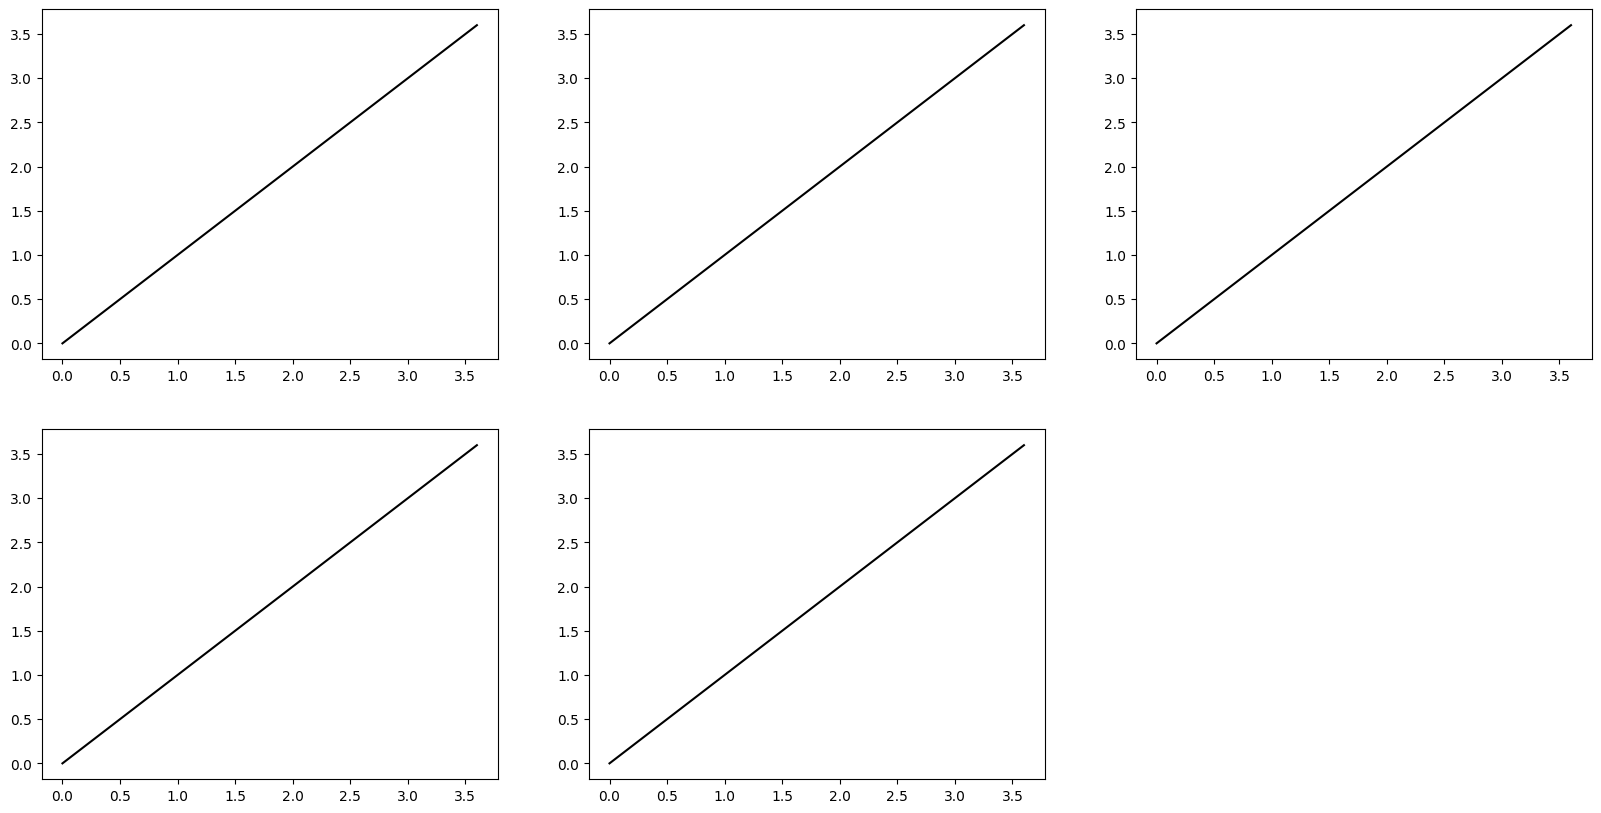

In [6]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 3.6, 100)
y = x
fig = plt.figure(figsize=(20, 10))
for i in range(5):
    ax = fig.add_subplot(2,3,i+1)
    ax.plot(x, y, color='black')
plt.show()